In [1]:
import json
import matplotlib.pyplot as plt
import os
import glob
import numpy as np


### Number of sequences and duration

In [2]:

all_records = json.load(open('./meta_records.json', 'r'))['records']
total_num_seq = 0
total_num_frames = 0

for record in all_records:
    assert record['num_views'] == len(record['views'])
    num_seq = record['num_sequences']
    num_views = record['num_views']
    total_num_seq += (int(num_seq) * int(num_views))
print('Total number of sequences:', total_num_seq)


for record in all_records:
    sequences = record['sequences']
    num_views = record['num_views']
    sequence_dur = 0
    # print(sequences['sequence_start_end_frame'])
    for st, ed in sequences['sequence_start_end_frame']:
        dur = ed - st + 1
        sequence_dur += dur
    sequence_dur *= num_views
    total_num_frames += sequence_du
print('Total number of frames:', total_num_frames)
print('Total duration(s):', total_num_frames / 30)
print('Total duration(h):', (total_num_frames / 30) / 3600)

Total number of sequences: 1276
Total number of frames: 3418123
Total duration(s): 113937.43333333333
Total duration(h): 31.649287037037038


### Number of actions

In [3]:
all_records = json.load(open('./meta_records.json', 'r'))['records']
total_num_act = 0
total_num_frames = 0

for record in all_records:
    assert record['num_views'] == len(record['views'])
    num_act = record['num_actions']
    num_views = record['num_views']
    total_num_act += (int(num_act) * int(num_views))
print('Total number of actions:', total_num_act)

Total number of actions: 6131


### Distrbution of duration of action sequences

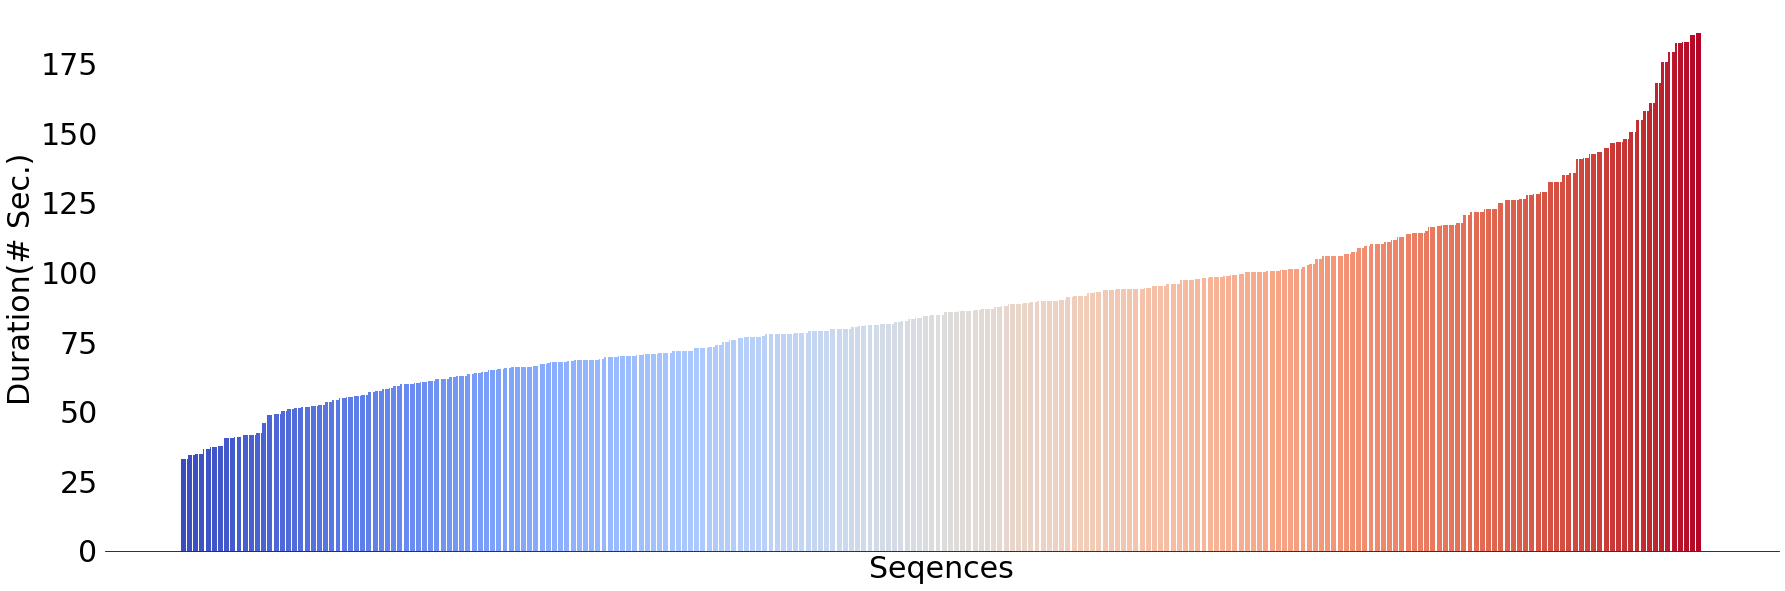

In [4]:
all_records = json.load(open('./meta_records.json', 'r'))['records']

sequence_durations = []
for record in all_records:
    sequences = record['sequences']
    num_views = record['num_views']
    # print(sequences['sequence_start_end_frame'])
    for st, ed in sequences['sequence_start_end_frame']:
        dur = ed - st + 1
        sequence_durations.extend([dur for _ in range(int(num_views))])
# len(sequence_durations)

# 示例数据
sequence_durations = np.array(sorted(sequence_durations))
categories = np.arange(len(sequence_durations))
values = sequence_durations.reshape(-1)

# 设置图的宽度和高度
fig = plt.figure(figsize=(30, 10))  # 8单位宽，4单位高
ax = fig.add_subplot(1, 1, 1)  # 获取图表的轴对象
ax.spines['top'].set_visible(False)  # 去掉上方边框
ax.spines['right'].set_visible(False)  # 去掉右方边框
ax.spines['left'].set_visible(False)  # 去掉左方边框
ax.yaxis.set_ticks_position('none') # 去掉左方刻度

# 创建渐变色映射
cmap = plt.get_cmap('coolwarm')

# 计算渐变色的位置
color_positions = np.linspace(0, 1, len(categories))

# 创建柱状图，每个柱子一个颜色
for i, value in enumerate(values):
    color = cmap(color_positions[i])
    plt.bar(categories[i], value/30, color=color)

# 添加标题和轴标签
# plt.title('Distribution of Duration of Action Sequences', fontsize=30)
plt.xlabel('Seqences', fontsize=30)
plt.ylabel('Duration(# Sec.)', fontsize=30)
# 修改横坐标和纵坐标的刻度标签大小
plt.xticks([])  # 设置横坐标刻度标签的大小为12
plt.yticks(fontsize=30)  # 设置纵坐标刻度标签的大小为12

# 保存图像为PNG文件
plt.savefig('seq_duration_bar.png')

# 显示柱状图
plt.show()

### Distribution of duration of single actions

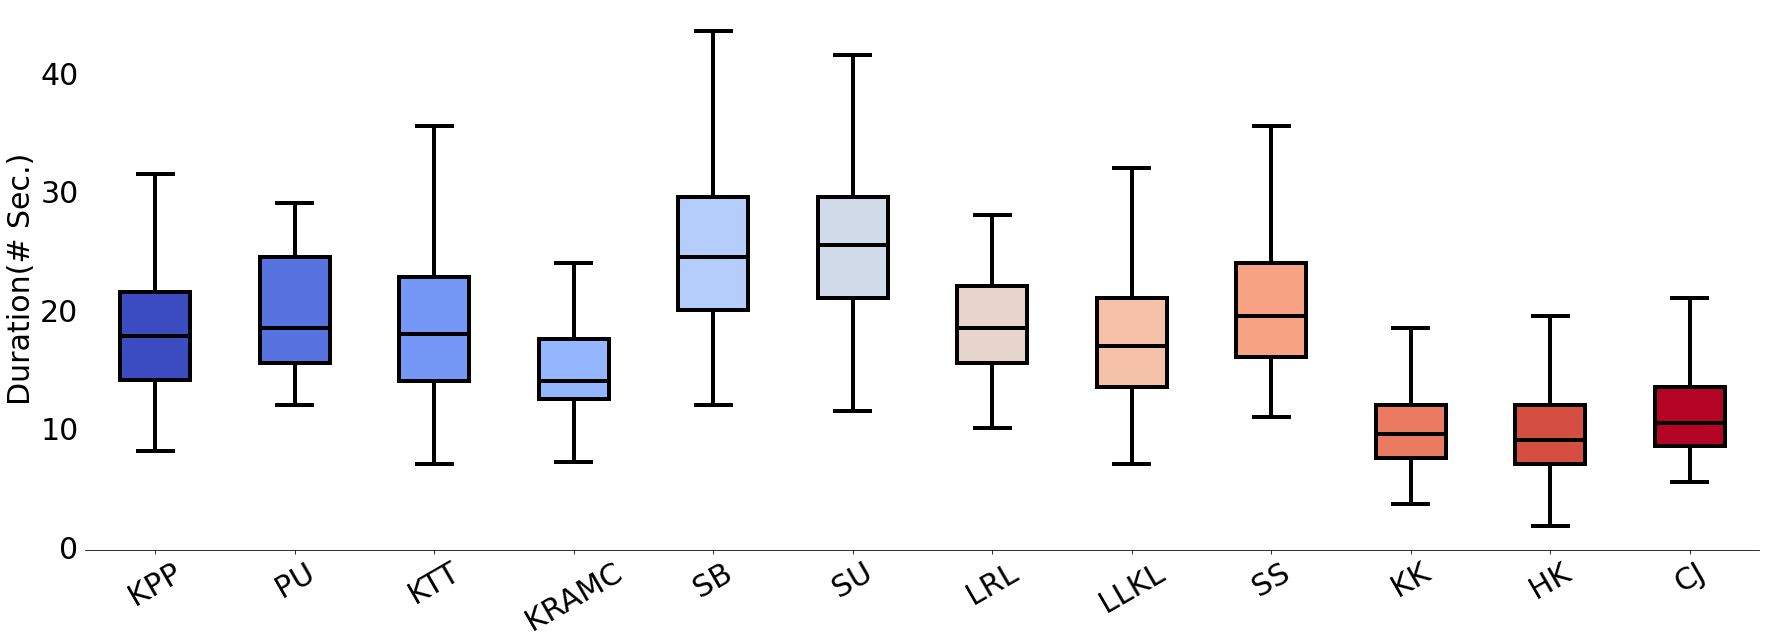

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch

duration_list = [[] for _ in range(12)]
meta_records = json.load(open('./meta_records.json', 'r'))
action_annots = json.load(open('./action_level_annotations.json', 'r'))
for key, value in action_annots.items():
    actions = value['action_info']
    actor_id = key
    num_views = meta_records['records'][meta_records['record_index'][actor_id]]['num_views']
    for action in actions:
        action_id = action[0]
        action_dur = (action[2] - action[1]) / 30
        # print(action_id)
        duration_list[action_id-1].extend([action_dur] * num_views)

duration_list[0]

# 示例数据
data = [np.array(duration_list[i]) for i in range(12)]
# 创建箱形图
# 设置图的宽度和高度
# plt.figure(figsize=(20, 10))  # 8单位宽，4单位高
fig = plt.figure(figsize=(30, 10))  # 8单位宽，4单位高
ax = fig.add_subplot(1, 1, 1)  # 获取图表的轴对象
ax.spines['top'].set_visible(False)  # 去掉上方边框
ax.spines['right'].set_visible(False)  # 去掉右方边框
ax.spines['left'].set_visible(False)  # 去掉左方边框
ax.yaxis.set_ticks_position('none') # 去掉左方刻度


# 自定义样式
boxprops = dict(linewidth=4, color='black', facecolor='none')
whiskerprops = dict(linewidth=4, color='black')
medianprops = dict(linewidth=4, color='black')
capprops = dict(linewidth=4, color='black')
flierprops = dict(marker='d', markersize=20, markerfacecolor='gray', linestyle='none')
# 设置渐变映射
cmap = plt.get_cmap('coolwarm')
# 计算渐变色的位置
color_positions = np.linspace(0, 1, 12)

# 创建渐变箱体的函数
def gradient_boxplot(bp, facecolor):
    for element in ['boxes']:
        path = PathPatch(bp[element][0]._path, facecolor=facecolor, edgecolor='blue', lw=boxprops['linewidth'])
        ax.add_patch(path)

# 绘制箱形图
bp = ax.boxplot(data, patch_artist=True, boxprops=boxprops, whiskerprops=whiskerprops,
                medianprops=medianprops, capprops=capprops, flierprops=flierprops, showfliers=False)

# 使用渐变色填充箱体
for i, box in enumerate(bp['boxes']):
    color = cmap(color_positions[i])
    gradient_boxplot({'boxes': [box]}, facecolor=color)

# 自定义标签
ax.set_xticklabels(['KPP', 'PU', 'KTT', 'KRAMC', 'SB', 'SU', 'LRL', 'LLKL', 'SS', 'KK', 'HK', 'CJ'],rotation=30, fontsize=30)
# 添加标题和标签 
# ax.set_title('Distributions of Duration of Each Action',fontsize=30)
# ax.set_xlabel('Action',fontsize=30)
ax.set_ylabel('Duration(# Sec.)',fontsize=30)
plt.yticks(fontsize=30)  # 设置纵坐标刻度标签的大小为12

# 保存图像为PNG文件
plt.savefig('action_duration_box.png')

# 显示图像
plt.show()

### Distribution of the number of different types of actions

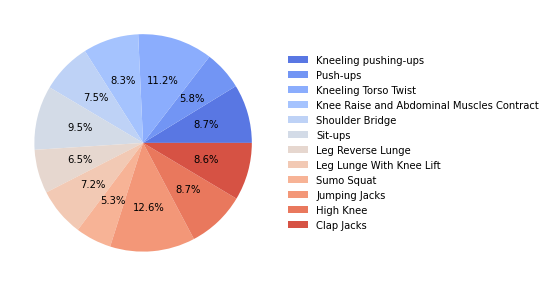

In [6]:
action_names = ["Kneeling pushing-ups",
        "Push-ups",
        "Kneeling Torso Twist",
        "Knee Raise and Abdominal Muscles Contract",
        "Shoulder Bridge",
        "Sit-ups",
        "Leg Reverse Lunge",
        "Leg Lunge With Knee Lift",
        "Sumo Squat",
        "Jumping Jacks",
        "High Knee",
        "Clap Jacks"]

actor_2_id = json.load(open('./actor_2_id.json', 'r'))
meta_records = json.load(open('./meta_records.json', 'r'))
num_action_list = [0 for _ in range(12)]

action_annots = json.load(open('./action_level_annotations.json', 'r'))
for key, value in action_annots.items():
    actions = value['action_info']
    actor_id = key
    num_views = meta_records['records'][meta_records['record_index'][actor_id]]['num_views']
    for action in actions:
        action_id = action[0]
        # print(action_id)
        num_action_list[action_id-1] += (1*num_views)
percent_values = [(i/sum(num_action_list)) for i in num_action_list]

colors = plt.get_cmap('coolwarm')(np.linspace(0.1, 0.9, len(num_action_list)))

fig, ax = plt.subplots(figsize=(8, 5))
wedges, texts, autotexts = ax.pie(num_action_list,  autopct='%1.1f%%',  colors=colors)

ingredients = [x for x in action_names]
ax.legend(wedges, ingredients,
        #   title="Actions",
        frameon=False,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# 保存图像为PNG文件
plt.savefig('acton_duration_pie.png')

# 显示柱状图
plt.show()

### Distrbution of the action quality scores

In [7]:
action_judgement = json.load(open('./interpretable_action_judgement.json', 'r'))

action_names = ["Kneeling pushing-ups",
        "Push-ups",
        "Kneeling Side Torso Twist",
        "Side Knee Raise And Abdominal Muscles Contract",
        "Shoulder Bridge",
        "Sit-ups",
        "Leg Reverse Lunge",
        "Leg Lunge With Knee Lift",
        "Sumo Squat",
        "Jumping Jacks",
        "High Knee",
        "Clap Jacks"]

action_score_list = [[] for _ in range(12)]

for key, value in action_judgement.items():
    annots = value['annotations']
    action_set = set()
    score_list = []
    for annot in annots:
        score = annot['action_quality_score']
        action_name = annot['action_name']
        action_set.add(action_name)
        score_list.append(score)
    assert len(action_set) == 1, print(key)
    avg_score = sum(score_list) / len(score_list)
    action_index = action_names.index(action_name)
    action_score_list[action_index].append(avg_score)

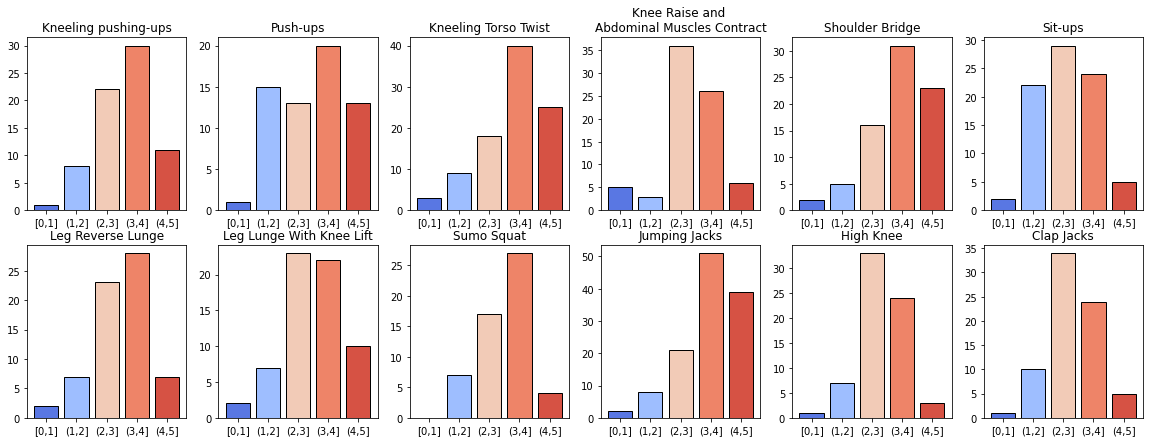

In [8]:
actions = ["Kneeling pushing-ups",
        "Push-ups",
        "Kneeling Torso Twist",
        "Knee Raise and \nAbdominal Muscles Contract",
        "Shoulder Bridge",
        "Sit-ups",
        "Leg Reverse Lunge",
        "Leg Lunge With Knee Lift",
        "Sumo Squat",
        "Jumping Jacks",
        "High Knee",
        "Clap Jacks"]


# 创建一个有两个子图的画布
fig, axs = plt.subplots(2,6, figsize=(20, 7))

for i in range(12):
    row = int(i / 6)
    col = i % 6
    
    score_list = action_score_list[i]
    sored_score_list = sorted(score_list)
    process_score_list = [s-1 for s in score_list]
    
    hist_list = [0 for i in range(5)]
    for num in score_list:
        if 0 <= num <= 1:
            hist_list[0] += 1
        elif 1 < num <= 2:
            hist_list[1] += 1
        elif 2 < num <= 3:
            hist_list[2] += 1
        elif 3 < num <= 4:
            hist_list[3] += 1
        elif 4 < num <= 5:
            hist_list[4] += 1
    
    bins = [1, 2, 3, 4, 5]
    counts = [0 for _ in bins]
    
    # colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(hist_list) - 1))
    x_labels = ['[0,1]', '(1,2]', '(2,3]', '(3,4]', '(4,5]']
    colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(hist_list)))
    colors = plt.cm.coolwarm([0.1,0.3,0.6,0.8,0.9])
    # 绘制直方图，并指定颜色映射
    # n, bins, patches = axs[row, col].hist(score_list, bins=bins, edgecolor='black', rwidth=1)
    axs[row, col].bar(x_labels, hist_list, edgecolor='black',color=colors)
    
    # 设置子图的标题
    axs[row, col].set_title(actions[i])
    # # 设置x轴刻度

# 保存图像为PNG文件
plt.savefig('score_distribution_bar.png')

# 显示图形
plt.show()